# Clase 02 - Visualización de gráficos avanzados

Profesor: **Fernando Becerra**, f.becerra@udd.cl, [www.fernandobecerra.com](www.fernandobecerra.com)

Esta semana veremos algunos tipos de gráficos más avanzados para aumentar nuestro repertorio.

Comenzamos importando las librerías que ocuparemos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Además agregamos una nueva: `seaborn`, el cual es otro paquete para graficar.

In [2]:
import seaborn as sns

Ahora cargamos los datos, los que corresponden a las muertes registradas por el DEIS del Ministerio de Salud, desde el 2010 hasta mayo de 2020 para las comunas de la Región Metropolitana.

In [3]:
deaths_file = '../datos/muertes_deis_rm.csv'
deaths_data = pd.read_csv(deaths_file)
deaths_data.head()


,comuna,año,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,Alhué,2020,4.0,4.0,7.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alhué,2019,2.0,NaN,5.0,3.0,2.0,6.0,2.0,NaN,4.0,3.0,4.0,5.0
2,Alhué,2018,1.0,2.0,2.0,8.0,1.0,5.0,1.0,4.0,8.0,6.0,3.0,NaN
3,Alhué,2017,3.0,4.0,2.0,4.0,3.0,3.0,1.0,2.0,6.0,1.0,2.0,2.0
4,Alhué,2016,5.0,NaN,1.0,2.0,1.0,3.0,4.0,2.0,1.0,4.0,5.0,4.0


Filtramos los datos para una sola comuna

In [4]:
comuna = 'Cerro Navia'
data = (
    deaths_data[deaths_data['comuna'] == comuna]
        .drop(['comuna'], axis=1)
        .set_index('año')
)
data.head()

,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
año,,,,,,,,,,,,
2020,66.0,54.0,86.0,75.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,64.0,78.0,60.0,83.0,76.0,97.0,95.0,84.0,85.0,66.0,83.0,52.0
2018,70.0,61.0,67.0,59.0,99.0,84.0,83.0,103.0,90.0,77.0,76.0,75.0
2017,76.0,58.0,62.0,65.0,90.0,87.0,99.0,93.0,85.0,74.0,65.0,76.0
2016,67.0,71.0,77.0,69.0,87.0,80.0,94.0,98.0,91.0,54.0,61.0,63.0


Y usamos la rutina `heatmap` de `seaborn`

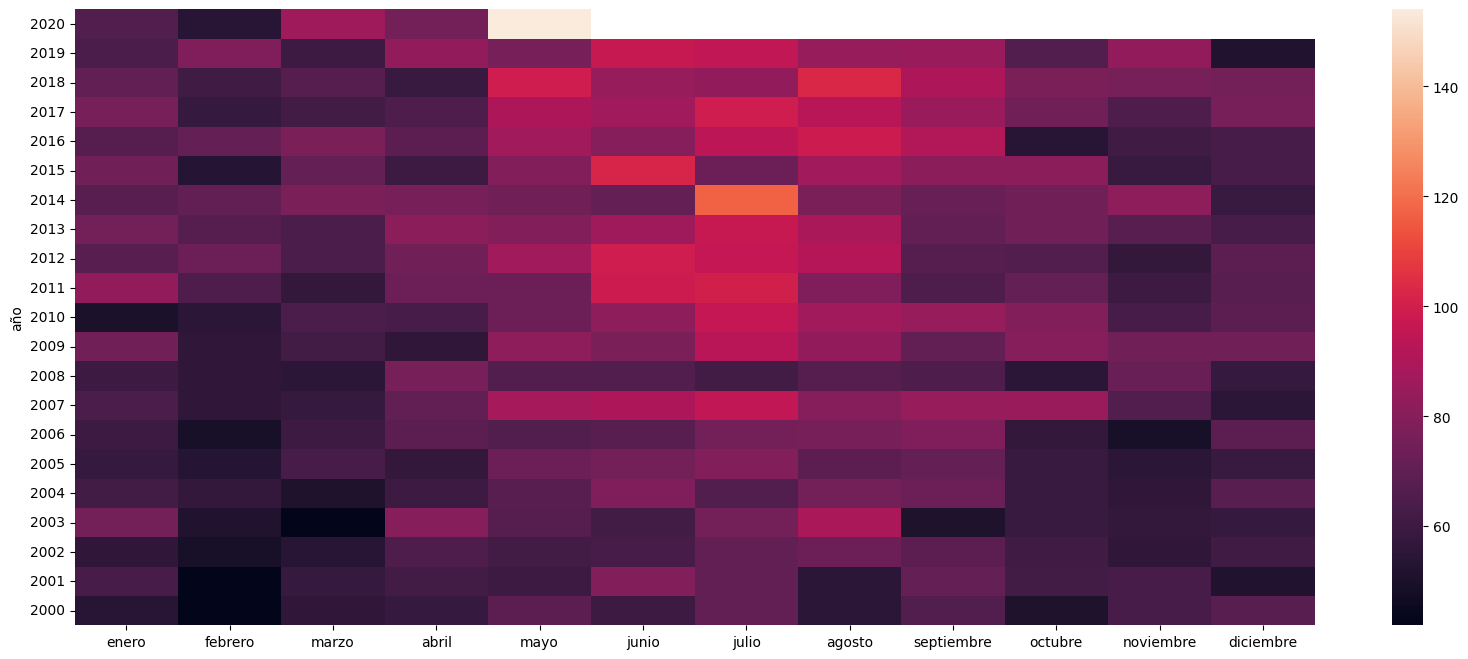

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(data, ax=ax)
plt.show()

Esto funciona a la primera porque nuestros datos ya están en el formato que nos conviene para graficar. Por eso hay que tener cuidado y experimentar con distintas opciones antes de usar los heatmap con más claridad. Ahora experimentemos un poco cambiando el mapa de color por uno que use colores oscuros para números más grandes.

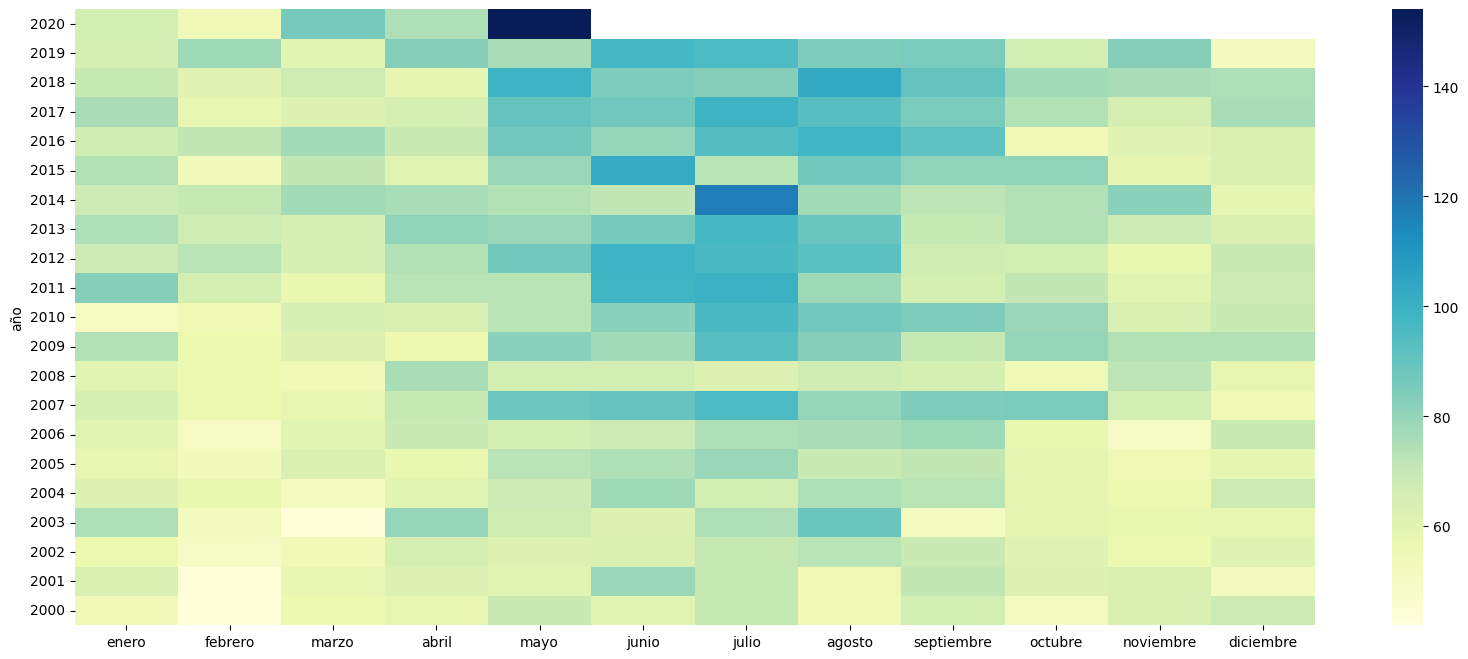

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20,8))
sns.heatmap(data, ax=ax, cmap='YlGnBu')
plt.show()

## Treemap  - Datos jerárquicos

Para hacer un treemap necesitamos instalar el paquete `squarify`

In [7]:
import squarify

Los datos que cargaremos son los aportes a las campañas del plebiscito constitucional de 2022

In [8]:
df = pd.read_excel('../datos/aportes_gastos_plebiscito.xlsx', sheet_name=['Aportes', 'Propaganda por Medios Digitales', 'Medios'])
df['Aportes'].head()

,Fecha Aporte,Tipo Organización,Nombre Organización,Rut Organización,Dv Organización,Tipo Aporte,Nombre Aportante,Opcion,Monto ($)
0,2022-06-16,OSC,LAS MENTORAS,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,RECHAZO,20000
1,2022-06-23,OSC,Agrupación social Fuerza y Unión De Derechos H...,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,3000
2,2022-06-26,OSC,Comando AprueboxChile,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,150000
3,2022-06-28,OSC,Comando AprueboxChile,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,20000
4,2022-06-28,OSC,Comando AprueboxChile,NaN,NaN,PERSONA NATURAL NO PUBLICO,NaN,APRUEBO,10000


Necesitamos procesarlos un poco para que queden en un formato que nos convenga graficarlo. Para eso calcularemos el aporte total por cada organización en la base de datos y la ordenaremos por el monto del aporte.

In [9]:
aportes = (
    df['Aportes'].groupby(['Nombre Organización', 'Opcion'])
        .agg(aporte=("Monto ($)", "sum"))
        .sort_values(['Opcion', 'aporte'], ascending=False)
        .reset_index()
)
aportes

,Nombre Organización,Opcion,aporte
0,CON MI PLATA NO - AGRUPACIÓN DE AHORRANTES PRE...,RECHAZO,151913777
1,Impulso Norte,RECHAZO,150486500
2,CHILE INFORMA,RECHAZO,134930001
3,AMARILLOS x CHILE,RECHAZO,118582242
4,ME IMPORTA CHILE,RECHAZO,118000000
...,...,...,...
142,Comisión chilena de derechos humanos de Viña d...,APRUEBO,85000
143,Comite de dd..hh. y ecologicos de Quilpue,APRUEBO,75000
144,ESIgualdad Chile,APRUEBO,60000
145,Ambientalistas por el Apruebo del Bio-Bio,APRUEBO,50000


Ocupamos `squarify` para crear nuestro primer treemap

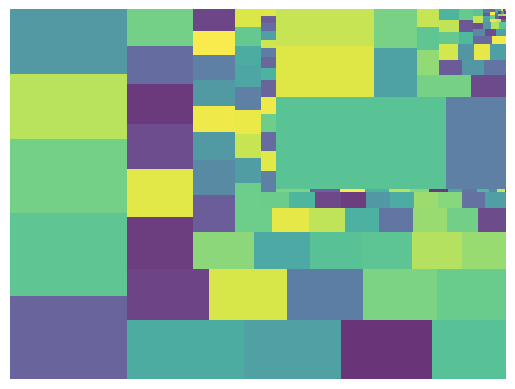

In [46]:
squarify.plot(sizes=aportes['aporte'], alpha=.8)
plt.axis('off')
plt.show()

## Circle packing - Datos jerárquicos

Algo parecido podemos hacer pero ahora con círculos. Para ello usaremos datos de población mundial, en formato json.

In [11]:
data = [{'id': 'World', 'datum': 6964195249, 'children' : [
              {'id' : "North America", 'datum': 450448697,
                   'children' : [
                     {'id' : "United States", 'datum' : 308865000},
                     {'id' : "Mexico", 'datum' : 107550697},
                     {'id' : "Canada", 'datum' : 34033000} 
                   ]},
              {'id' : "South America", 'datum' : 278095425, 
                   'children' : [
                     {'id' : "Brazil", 'datum' : 192612000},
                     {'id' : "Colombia", 'datum' : 45349000},
                     {'id' : "Argentina", 'datum' : 40134425}
                   ]},
              {'id' : "Europe", 'datum' : 209246682,  
                   'children' : [
                     {'id' : "Germany", 'datum' : 81757600},
                     {'id' : "France", 'datum' : 65447374},
                     {'id' : "United Kingdom", 'datum' : 62041708}
                   ]},
              {'id' : "Africa", 'datum' : 311929000,  
                   'children' : [
                     {'id' : "Nigeria", 'datum' : 154729000},
                     {'id' : "Ethiopia", 'datum' : 79221000},
                     {'id' : "Egypt", 'datum' : 77979000}
                   ]},
              {'id' : "Asia", 'datum' : 2745929500,  
                   'children' : [
                     {'id' : "China", 'datum' : 1336335000},
                     {'id' : "India", 'datum' : 1178225000},
                     {'id' : "Indonesia", 'datum' : 231369500}
                   ]}
    ]}]

Necesitamos instalar el paquete `circlify`

In [12]:
import circlify

Y lo ocupamos para calcular los círculos

In [13]:
# Compute circle positions thanks to the circlify() function
circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)
circles

[Circle(x=0.0, y=0.0, r=1.0, level=1, ex={'id': 'World', 'datum': 6964195249, 'children': [{'id': 'North America', 'datum': 450448697, 'children': [{'id': 'United States', 'datum': 308865000}, {'id': 'Mexico', 'datum': 107550697}, {'id': 'Canada', 'datum': 34033000}]}, {'id': 'South America', 'datum': 278095425, 'children': [{'id': 'Brazil', 'datum': 192612000}, {'id': 'Colombia', 'datum': 45349000}, {'id': 'Argentina', 'datum': 40134425}]}, {'id': 'Europe', 'datum': 209246682, 'children': [{'id': 'Germany', 'datum': 81757600}, {'id': 'France', 'datum': 65447374}, {'id': 'United Kingdom', 'datum': 62041708}]}, {'id': 'Africa', 'datum': 311929000, 'children': [{'id': 'Nigeria', 'datum': 154729000}, {'id': 'Ethiopia', 'datum': 79221000}, {'id': 'Egypt', 'datum': 77979000}]}, {'id': 'Asia', 'datum': 2745929500, 'children': [{'id': 'China', 'datum': 1336335000}, {'id': 'India', 'datum': 1178225000}, {'id': 'Indonesia', 'datum': 231369500}]}]}),
 Circle(x=-0.1891573044970616, y=0.7725949609

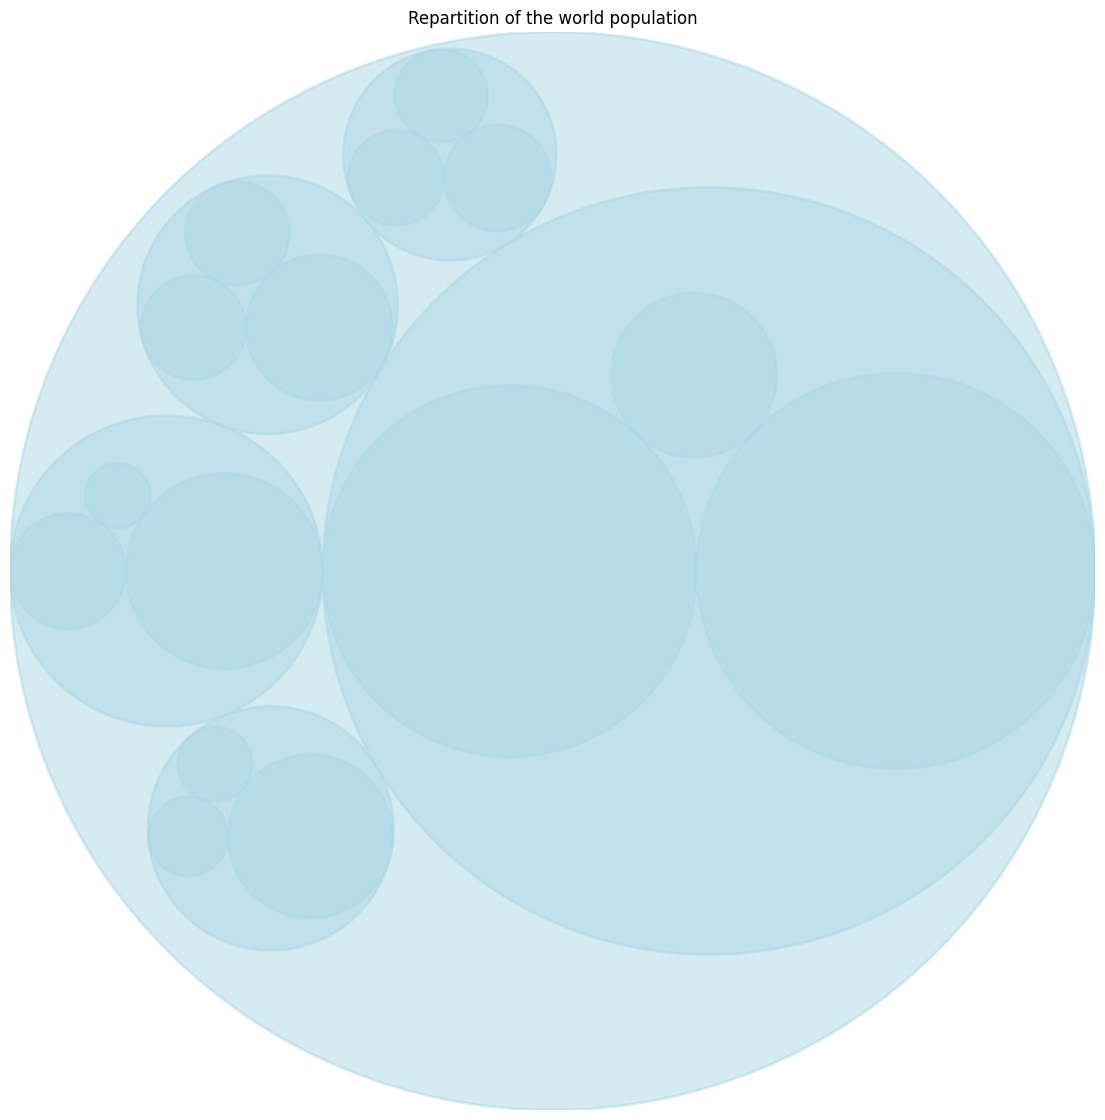

In [14]:
fig, ax = plt.subplots(figsize=(14,14))

ax.set_title('Repartition of the world population')

# Borrar ejes
ax.axis('off')

# Encontrar minimo y maximo
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)

# Graficar los circulos del nivel superior
for circle in circles:
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

## Parallel coordinates - datos multidimensionales

Cuando tenemos datos que tienen más de 3 ó 4 propiedades, gráficos como el de barra o el de dispersión quedan cortos y no son suficiente, es por eso que usamos otras técnicas de representación para ver todas las variables al mismo tiempo y explorar si hay alguna relación entre ellas. Una opción son las coordenadas paralelas, las cuales podemos importar desde `pandas`.

In [15]:
from pandas.plotting import parallel_coordinates

Cargamos datos de exoplanetas

In [16]:
data = pd.read_csv("../datos/exoplanets.csv")
data.head()

,NAME,SIMBADNAME,SIMBADURL,DATE,MASS,R,BMV,MSTAR,RSTAR,TEFF,A,PER,ECC,DIST,NCOMP,PLANETDISCMETH
0,Kepler-107 d,Kepler-107,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2014,0.003712,0.095459,NaN,NaN,1.411,5851.0,0.078010,7.958203,NaN,NaN,4,Transit
1,Kepler-427 b,2MASS J19130109+4342175,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2010,0.290000,1.230000,NaN,0.960,1.350,5800.0,0.091351,10.290994,0.000,1100.0,1,Transit
2,WASP-14 b,BD+22 2716,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2009,7.692340,1.281000,0.46,1.310,1.310,6475.0,0.036769,2.243752,0.091,160.0,1,Transit
3,Kepler-50 b,Kepler-50,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2011,0.016491,0.196096,0.48,1.230,1.880,6058.0,0.082560,7.812512,NaN,NaN,2,Transit
4,Kepler-20 b,Kepler-20,http://simbad.harvard.edu/simbad/sim-id?Ident=...,2011,0.026665,0.170247,0.90,0.912,0.944,5466.0,0.045370,3.696122,0.000,290.0,5,Transit


Seleccionamos sólo las variables que usaremos para graficar.

In [17]:
df = data[['MASS', 'R', 'BMV', 'MSTAR', 'RSTAR', 'TEFF', 'A', 'PER', 'ECC', 'DIST', 'PLANETDISCMETH']].dropna().reset_index(drop=True)
df.head()

,MASS,R,BMV,MSTAR,RSTAR,TEFF,A,PER,ECC,DIST,PLANETDISCMETH
0,7.692340,1.281000,0.460000,1.310,1.310,6475.0,0.036769,2.243752,0.091000,160.000,Transit
1,0.026665,0.170247,0.900000,0.912,0.944,5466.0,0.045370,3.696122,0.000000,290.000,Transit
2,0.617485,1.020000,0.990000,0.920,0.870,5190.0,0.039949,3.039577,0.000000,204.000,Transit
3,0.300272,1.070000,0.540000,1.010,1.060,5800.0,0.052109,4.322482,0.000000,242.131,Transit
4,0.000000,0.116766,0.599999,0.690,0.640,4925.0,0.055279,5.714932,0.070711,368.000,Transit


Y ocupamos las coordenadas paralelas de `pandas`

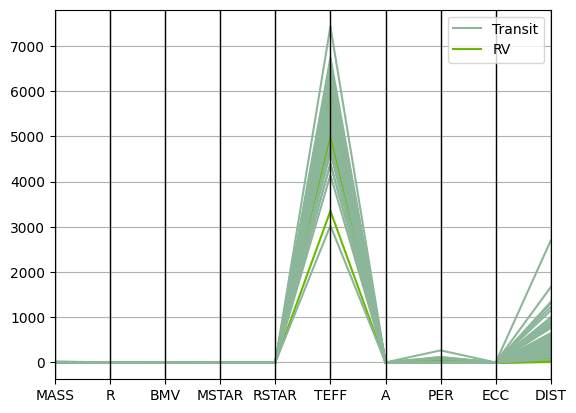

In [18]:
ax = parallel_coordinates(df, 'PLANETDISCMETH')

Lamentablemente este método tiene varios problemas. Entre otros, el principal es que no se pueden ajustar las escalas del eje y para las distintas columnas. Para resolver eso, usaremos una función especial para crear coordenadas paralelas sacada de [acá](http://benalexkeen.com/parallel-coordinates-in-matplotlib/).

In [19]:
from matplotlib import ticker

def plot_parallel_coordinates(df, cat_col, cols, colours):
    
    x = [i for i, _ in enumerate(cols)]

    # Create (X-1) sublots along x axis
    fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

    # Get min, max and range for each column
    # Normalize the data for each column
    min_max_range = {}
    for col in cols:
        min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
        df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

    # Plot each row
    for i, ax in enumerate(axes):
        for idx in df.index:
            mpg_category = df.loc[idx, cat_col]
            ax.plot(x, df.loc[idx, cols].to_numpy(), colours[mpg_category])
        ax.set_xlim([x[i], x[i+1]])

    # Set the tick positions and labels on y axis for each plot
    # Tick positions based on normalised data
    # Tick labels are based on original data
    def set_ticks_for_axis(dim, ax, ticks):
        min_val, max_val, val_range = min_max_range[cols[dim]]
        step = val_range / float(ticks-1)
        tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
        norm_min = df[cols[dim]].min()
        norm_range = np.ptp(df[cols[dim]])
        norm_step = norm_range / float(ticks-1)
        ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
        ax.yaxis.set_ticks(ticks)
        ax.set_yticklabels(tick_labels)

    for dim, ax in enumerate(axes):
        ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
        set_ticks_for_axis(dim, ax, ticks=6)
        ax.set_xticklabels([cols[dim]])


    # Move the final axis' ticks to the right-hand side
    ax = plt.twinx(axes[-1])
    dim = len(axes)
    ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[-2], cols[-1]])


    # Remove space between subplots
    plt.subplots_adjust(wspace=0)

    # Add legend to plot
    plt.legend(
        [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df[cat_col].cat.categories],
        df[cat_col].cat.categories,
        bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

    return fig, ax

Ahora definimos las variables que nos pide la función, entre ellas: el dataframe, la columna que ocuparemos como categoría, las columnas que queremos graficar y los colores de las categorías en forma de diccionario.

In [20]:
cat_col = 'PLANETDISCMETH'

cols = ['MASS', 'R', 'BMV', 'MSTAR', 'RSTAR', 'TEFF', 'A', 'PER', 'ECC', 'DIST']
colours = ['#2e8ad8', '#cd3785']

df[cat_col] = df[cat_col].astype('category')

colours = {df[cat_col].cat.categories[i]: colours[i] for i, _ in enumerate(df[cat_col].cat.categories)}


Y ocupamos la función ya definida

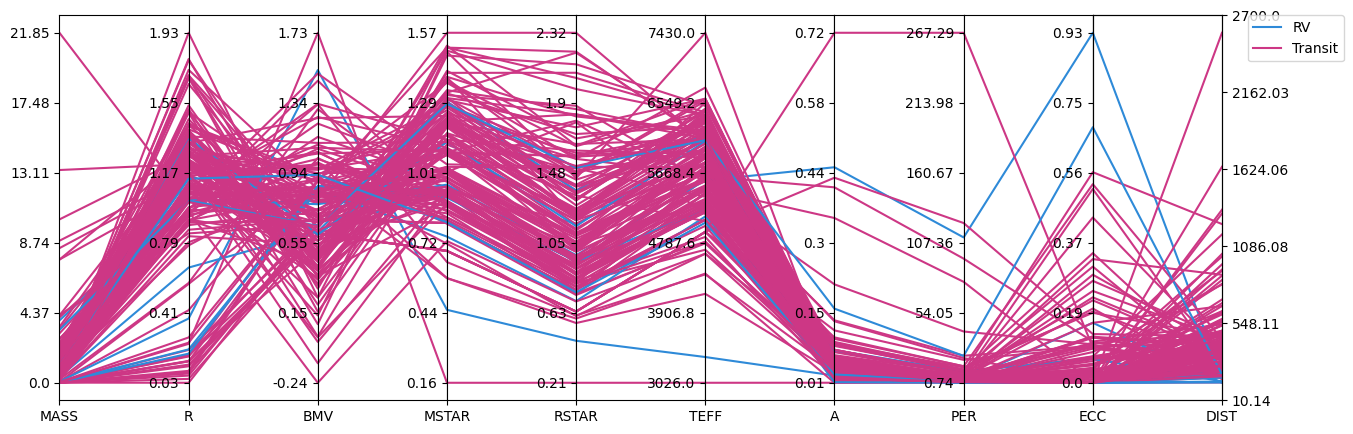

In [21]:
fig, ax = plot_parallel_coordinates(df, 'PLANETDISCMETH', cols, colours)

## Streamgraph

El streamgraph consiste básicamente en un stacked area chart suavizado. Para la parte de suavizar el gráfico será necesatio ocupar `scipy`.

In [22]:
from scipy import stats

Partamos creando datos aleatorios

In [23]:
x = np.arange(1990, 2020) # (N,) array-like
y = [np.random.randint(0, 5, size=30) for _ in range(5)] # (M, N) array-like

Y creemos un stacked area chart

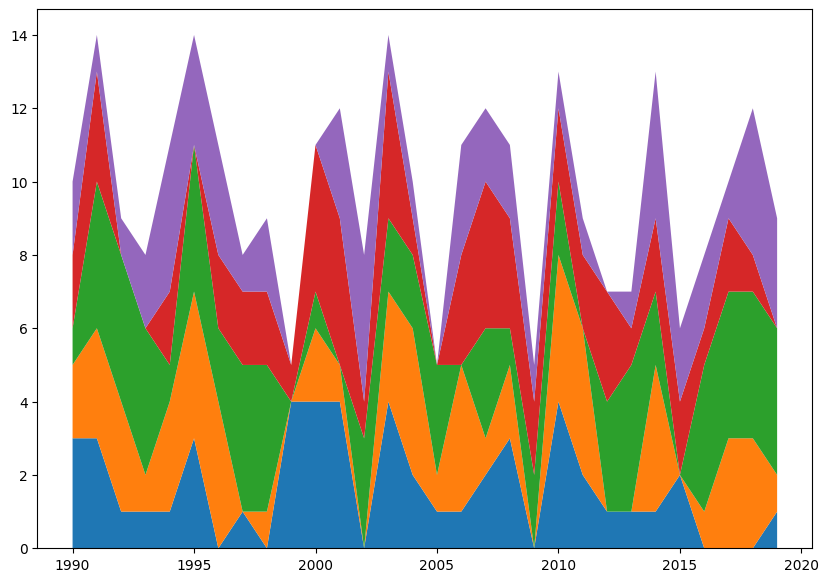

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y);

Para un streamgraph es necesario mover el gráfico de tal forma que el eje y se ubique a la mitad del gráfico.

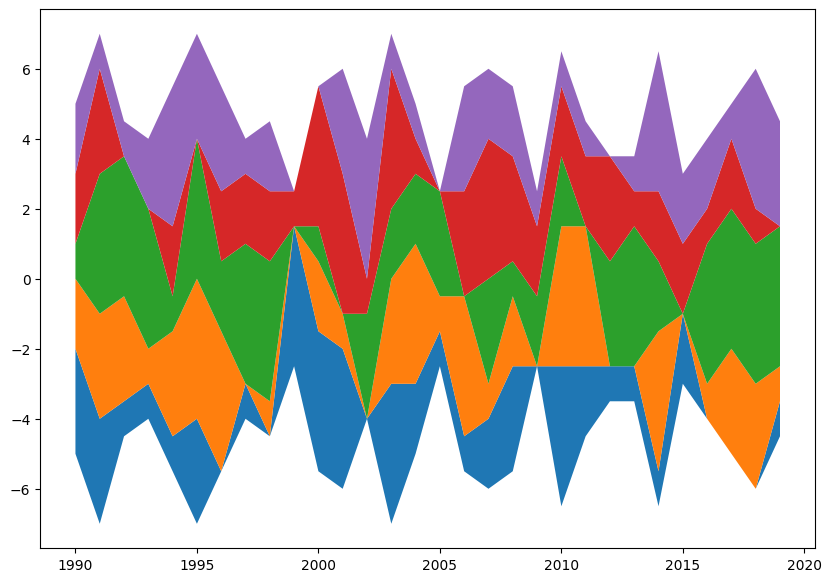

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.stackplot(x, y, baseline="sym")


In [26]:
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

Entonces podemos definir una función que nos calcula la versión suavizada de cualquier serie de datos.

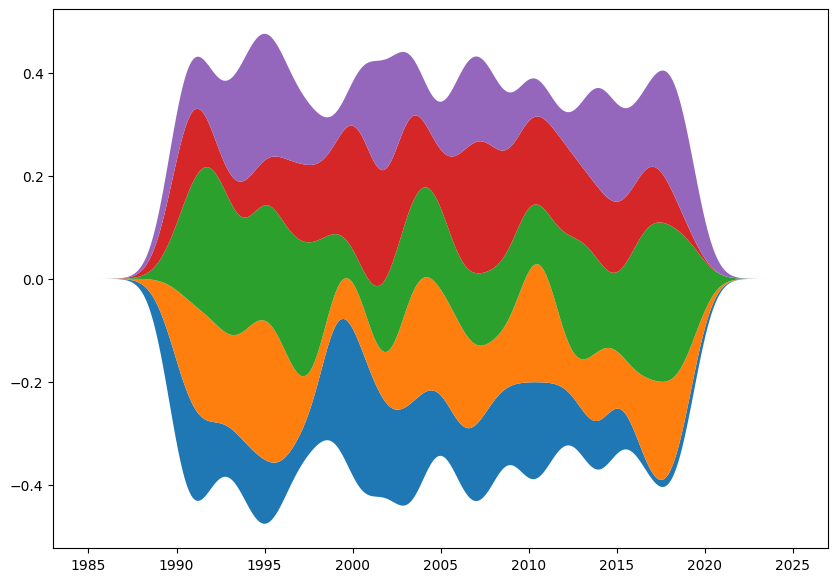

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
grid = np.linspace(1985, 2025, num=500)
y_smoothed = [gaussian_smooth(x, y_, grid, 1) for y_ in y]
ax.stackplot(grid, y_smoothed, baseline="sym");

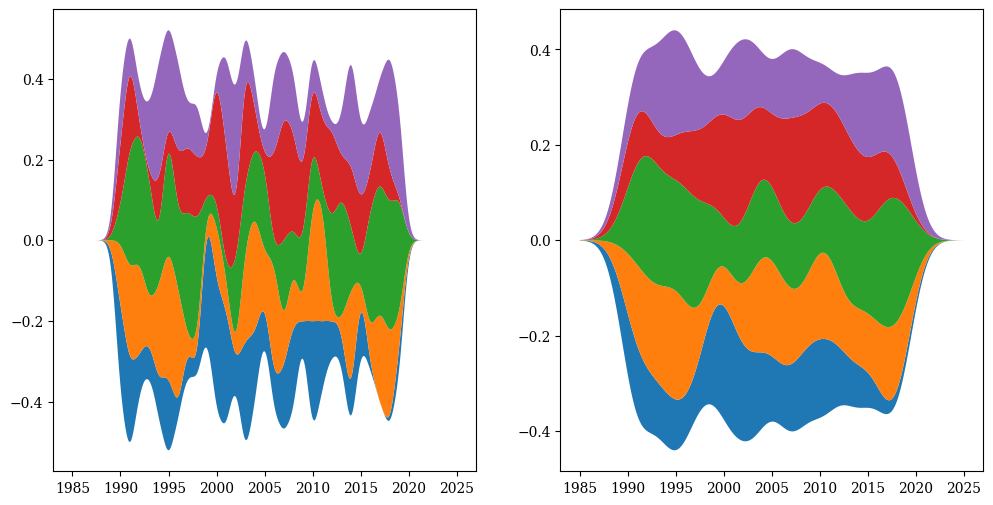

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# sd of 0.6
y_smoothed_1 = [gaussian_smooth(x, y_, grid, 0.6) for y_ in y]
# sd of 1.5
y_smoothed_2 = [gaussian_smooth(x, y_, grid, 1.5) for y_ in y]

ax[0].stackplot(grid, y_smoothed_1, baseline="sym")
ax[1].stackplot(grid, y_smoothed_2, baseline="sym");

## Sankey diagram

Para hacer un diagrama de Sankey necesitamos instalar e importar el paquete `pySankey`.

In [29]:
from pySankey.sankey import sankey

Cargamos unos de los datos que vienen de ejemplo

In [30]:
url = "../datos/customers-goods.csv"
df = pd.read_csv(url, sep=",")
df.head()

,Unnamed: 0,customer,good,revenue
0,0,John,fruit,5.5
1,1,Mike,meat,11.0
2,2,Betty,drinks,7.0
3,3,Ben,fruit,4.0
4,4,Betty,bread,2.0


Y usemos los pesos para ambos lados del diagrama.

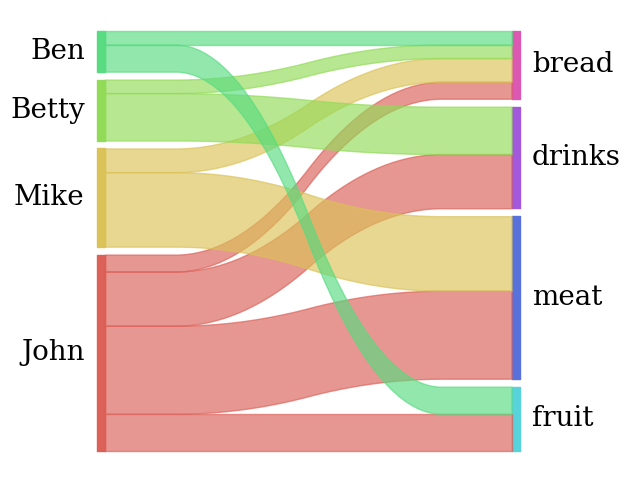

In [31]:
sankey(
    left=df["customer"], right=df["good"], 
    leftWeight= df["revenue"], rightWeight=df["revenue"], 
    aspect=20, fontsize=20
)

## Mapas

 Para los datos geográficos trabajaremos con el paquete `geopandas`

In [32]:
import geopandas as gpd

d:\Evolet Group\Repos\.venv\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\carlos\AppData\Local\Temp\ipykernel_10772\3841419929.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io

Para cargar datos geográficos ocupamos la función `read_file` de geopandas. En cuanto a formato de los datos, usualmente los podemos encontrar ya sea en shapefile (`.shp`) o geojson (`.geojson` o simplemente `.json`). Para este ejemplo usaremos datos publicados por [Tercera dosis](https://terceradosis.cl/2022/09/16/plebiscito-de-salida-y-la-distribucion-urbana-de-la-elite-progresista-los-veinte-barrios-donde-se-concentro-el-apruebo-en-santiago/) en un interesante artículo/análisis del resultado del plebiscito 2022. Ahora tenemos que bajar los datos que los autores compartieron desde [acá](https://storage.googleapis.com/notas-blog-public/varios/sf_santiago_plebiscito.zip) y ver qué es lo que hay adentro.

In [33]:
rm = gpd.read_file('../datos/sf_santiago_plebiscito/voronoi_attributes.shp')
rm.head()

,codigo_loc,comuna,nse_i,apruebo,rechazo,tot_valido,geometry
0,[1733],CERRILLOS,37.594543,0.469109,0.530891,4095,"POLYGON ((-70.72254 -33.49501, -70.71455 -33.4..."
1,[1734],CERRILLOS,67.015111,0.453894,0.546106,4327,"POLYGON ((-70.71627 -33.52768, -70.71867 -33.5..."
2,[1735],CERRILLOS,26.543418,0.459471,0.540529,4540,"POLYGON ((-70.71942 -33.51049, -70.72706 -33.4..."
3,[1736],CERRILLOS,49.455092,0.394460,0.605540,5235,"POLYGON ((-70.71446 -33.48593, -70.71276 -33.4..."
4,[1737],CERRILLOS,33.815220,0.431068,0.568932,4062,"POLYGON ((-70.72369 -33.49389, -70.71446 -33.4..."


Como `geopandas` es básicamente una extensión de `pandas`, los dataframe cargados tiene funciones y métodos similares. Usemos, por ejemplo, el `.plot`.

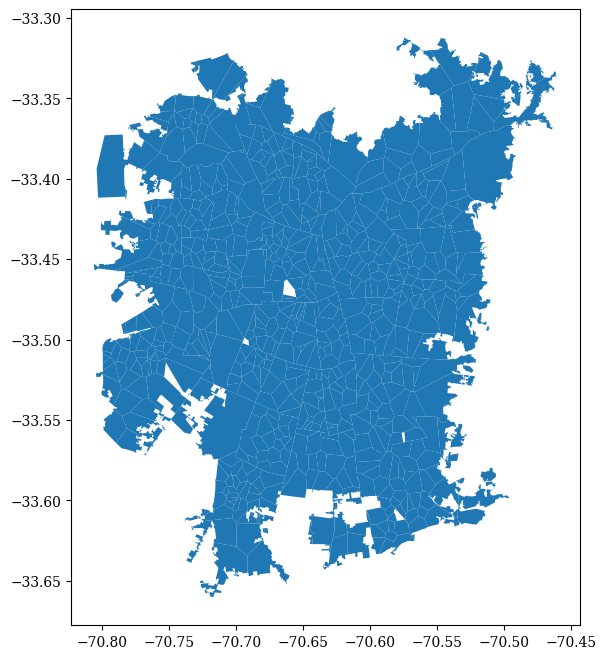

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

rm.plot(ax=ax)

plt.show()

In [35]:
'''
!pip install --upgrade  mapclassify==2.5.0
!pip install --upgrade  geopandas==0.12.2
!pip install --upgrade  pysal==2.6
'''

'\n!pip install --upgrade  mapclassify==2.5.0\n!pip install --upgrade  geopandas==0.12.2\n!pip install --upgrade  pysal==2.6\n'

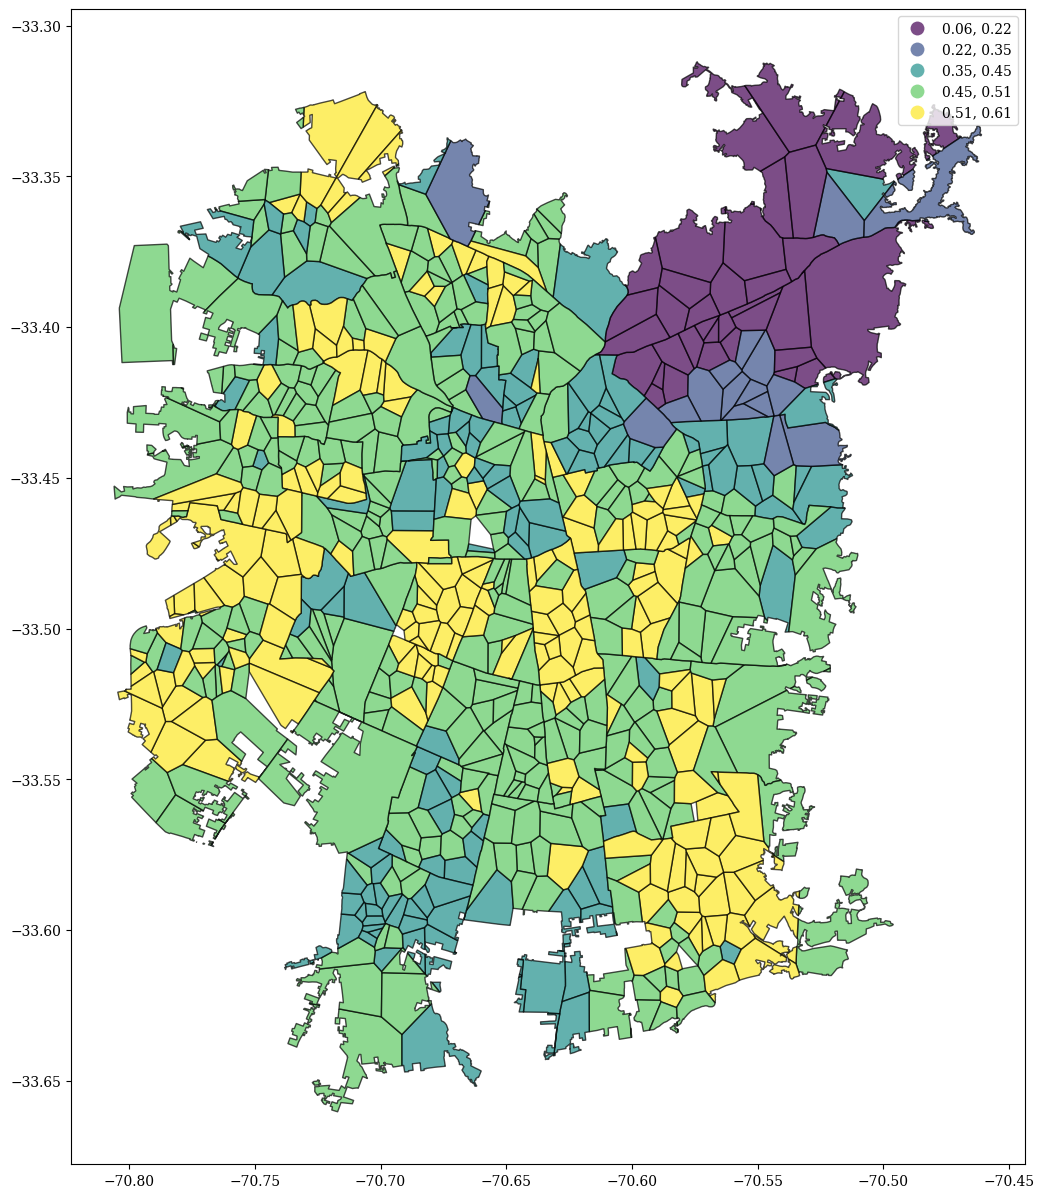

In [54]:
ax = rm.plot(column='apruebo', edgecolor="black", legend=True, alpha=0.7, scheme='fisher_jenks', figsize=(15,15))

plt.show()

Esta geometría se llama [celdas de Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram) y son útiles para [dividir el espacio en base a una serie de puntos](https://observablehq.com/@d3/voronoi-labels), donde el resultado es que cada celda es la más cercana sólo a uno de aquellos puntos.

## Redes

Primero, importamos [networkx](https://networkx.org/documentation/stable/index.html), que es el paquete que nos facilitará la vida al momento de graficar redes.

In [37]:
import networkx as nx

Cargamos los datos, que son las interacciones de los personajes de la novela Les Miserables.

In [222]:
ls = pd.read_csv('../datos/lesmiserables.csv')
ls.head()

,source,target,value
0,Napoleon,Myriel,1
1,Mlle.Baptistine,Myriel,8
2,Mme.Magloire,Myriel,10
3,Mme.Magloire,Mlle.Baptistine,6
4,CountessdeLo,Myriel,1


Creamos la read a partir de esos datos.

In [223]:
network = nx.from_pandas_edgelist(ls)

Y la dibujamos

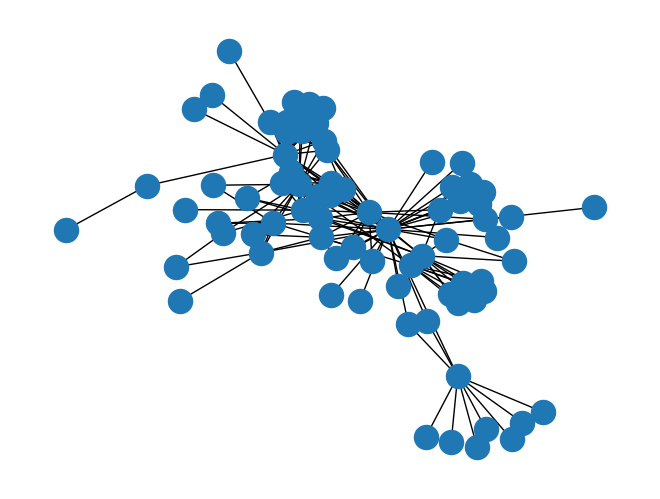

In [225]:
nx.draw(network)

Podemos agregar algunas opciones para que se vea mejor.

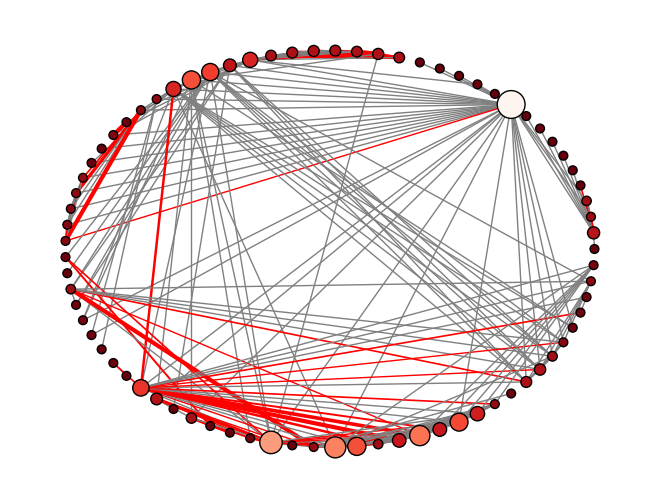

In [226]:
color_node = pd.concat([ls[['source', 'value']], ls[['target', 'value']].rename(columns={'target': 'source'})], axis=0).groupby('source').sum()
color_node = (color_node - color_node.min()) / (color_node.max() - color_node.min())
q_c = 0.85

options = {
    "node_color": [color_node.loc[node].values[0] for node in network.nodes],#"steelblue",
    "edgecolors": "black",
    "edge_color": ls['value'].apply(lambda x: 'gray' if x<ls['value'].quantile(q_c).astype(int) else 'red').tolist(), #'lightgray',
    "width": ls['value'].apply(lambda x: 1 if x<ls['value'].quantile(q_c).astype(int) else min(x/ls['value'].quantile(q_c).astype(int), 3)).tolist(), #'lightgray',
    "node_size": [max(0.1, color_node.loc[node].values[0]) * 400 for node in network.nodes],
    "cmap": plt.cm.Reds_r
}

pos = nx.circular_layout(network)

nx.draw(network, pos, **options)